# Pymaceuticals Inc.
---

### Analysis

- Importing data and viewing data.
 

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
unique_mice_count = mouse_data_complete['Mouse ID'].nunique()
print("Number of unique mice:", unique_mice_count)

Number of unique mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_combinations_count = mouse_data_complete.groupby(['Mouse ID', 'Timepoint']).size().reset_index().shape[0]
print("Number of unique combinations of Mouse ID and Timepoint:", unique_combinations_count)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


Number of unique combinations of Mouse ID and Timepoint: 1888


In [13]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_rows = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the Mouse ID values of the duplicate rows
duplicate_mice_ids = duplicate_rows['Mouse ID'].unique()

# Print the Mouse IDs with duplicate records
print("Duplicate mice by ID number for Mouse ID and Timepoint:")
print(duplicate_mice_ids)


Duplicate mice by ID number for Mouse ID and Timepoint:
['g989']


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'
duplicate_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'] == duplicate_mouse_id]

# Print all the data for the duplicate Mouse ID
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep ='first')

# Print the clean DataFrame
clean_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [110]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_mouse_df['Mouse ID'].nunique()
print("Number of unique mice in cleaned DataFrame is ", unique_mice_count)

Number of unique mice in cleaned DataFrame is  249


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Group data by 'Drug Regimen'
grouped = clean_mouse_df.groupby('Drug Regimen')

# Calculate mean, median, variance, standard deviation, and SEM of tumor volume
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats_mean = grouped['Tumor Volume (mm3)'].mean()
summary_stats_median = grouped['Tumor Volume (mm3)'].median()
summary_stats_var = grouped['Tumor Volume (mm3)'].var()
summary_stats_std = grouped['Tumor Volume (mm3)'].std()
summary_stats_sem = grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
# Name the columns for clarity
summary_stats = pd.DataFrame({"Mean Tumor Volume": summary_stats_mean, "Median Tumor Volume": summary_stats_median,
                              "Tumor Volume Variance": summary_stats_var, "Tumor Volume Std. Deviation" : summary_stats_std,
                              "Tumor Volume Std. Err":summary_stats_sem
    })
# Print the summary DataFrame
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats1 = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# just a step furthur to rename the columns above to match the table orignally created
summary_stats2 = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats2 = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Deviation',
    'sem': 'Tumor Volume SEM'
})
# Print the summary DataFrame
summary_stats2


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

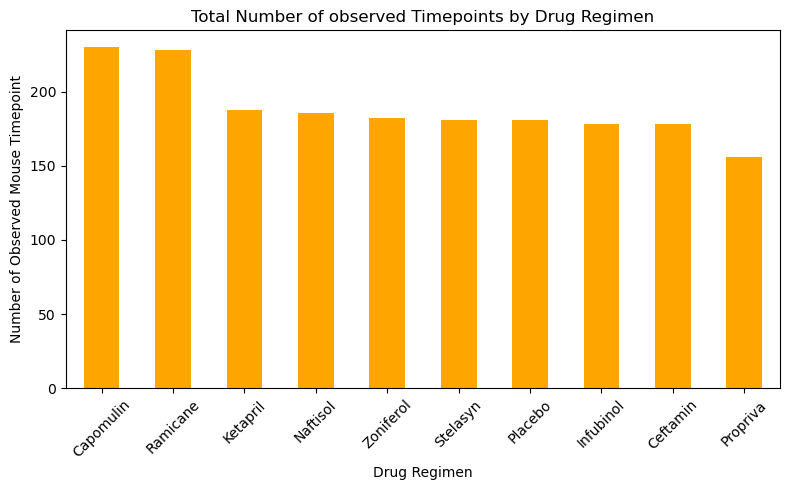

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group data by 'Drug Regimen' and count the number of rows in each group
regimen_counts = clean_mouse_df['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', color='orange', figsize=(8, 5))

# Set labels and title
plt.title('Total Number of observed Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoint')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group data by 'Drug Regimen' and count the number of rows in each group
regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Set labels and title
plt.title('Total Number of Rows by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


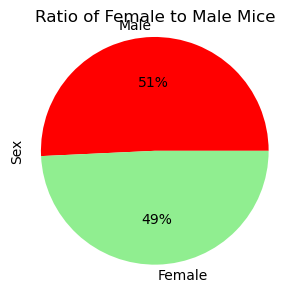

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group data by 'Sex' and count the number of mice in each group
sex_counts = clean_mouse_df['Sex'].value_counts()

# Create a pie plot
sex_counts.plot(kind='pie', autopct='%1.f%%', colors=['red', 'lightgreen'], figsize=(3, 3))

# Set the title
plt.title('Ratio of Female to Male Mice')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


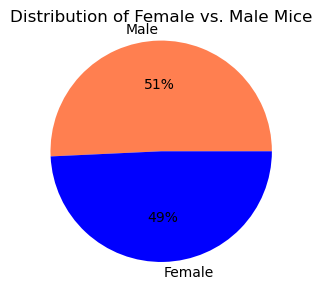

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group data by 'Sex' and count the number of mice in each group
sex_counts = clean_mouse_df['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(3, 3))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.f%%', colors=['coral', 'blue'])

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_mouse_timepoints = clean_mouse_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(last_mouse_timepoints, clean_mouse_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the specified treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged_mouse_df[merged_mouse_df['Drug Regimen'].isin(target_regimens)]

# Display the DataFrame with final tumor volumes
print("DataFrame with final tumor volumes")
final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]



DataFrame with final tumor volumes


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543
...,...,...,...,...
239,y769,Ceftamin,45,68.594745
240,y793,Capomulin,45,31.896238
241,y865,Ceftamin,45,64.729837
245,z578,Ramicane,45,30.638696


In [73]:
for treatment in treatments:
    # Filter the DataFrame for the current treatment regimen
    regimen_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    
    # Get the tumor volume data for the current regimen
    tumor_volume = regimen_data['Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR for the current regimen
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Locate potential outliers for the current regimen
    potential_outliers = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) | (regimen_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print information about potential outliers for the current regimen
    print(f"Potential outliers for {treatment}:")
    print(potential_outliers[['Mouse ID', 'Tumor Volume (mm3)']])
    print("\n")


Potential outliers for Capomulin:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []


Potential outliers for Ramicane:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []


Potential outliers for Infubinol:
   Mouse ID  Tumor Volume (mm3)
31     c326           36.321346


Potential outliers for Ceftamin:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []




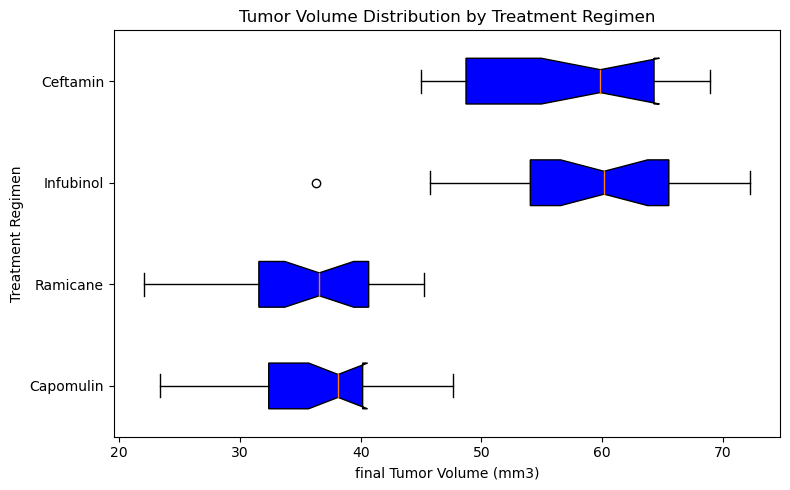

In [86]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a dictionary to store tumor volume data for each treatment regimen
tumor_volume_data = {
    'Capomulin': final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'],
    'Ramicane': final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'],
    'Infubinol': final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'],
    'Ceftamin': final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'],
}

# Create a list of treatment regimen names for the x-axis labels
regimen_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a box plot
plt.figure(figsize=(8, 5))
plt.boxplot(tumor_volume_data.values(), labels=regimen_names, notch=True, vert=False, patch_artist=True,
            boxprops=dict(facecolor='blue'))

# Set labels and title
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.xlabel('final Tumor Volume (mm3)')
plt.ylabel('Treatment Regimen')

# Display the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

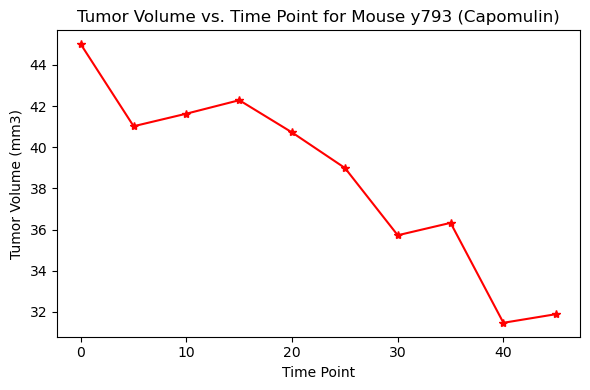

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomul

# Choose a specific mouse ID treated with Capomulin 
selected_mouse_id = 'y793'

# Filter the DataFrame to get data for the selected mouse treated with Capomulin
selected_mouse_data = clean_mouse_df[(clean_mouse_df['Drug Regimen'] == 'Capomulin') & (clean_mouse_df['Mouse ID'] == selected_mouse_id)]

# Extract time points and tumor volumes
time_points = selected_mouse_data['Timepoint']
tumor_volumes = selected_mouse_data['Tumor Volume (mm3)']

# Create a line plot
plt.figure(figsize=(6, 4))
plt.plot(time_points, tumor_volumes, marker='*', linestyle='-', color='r')

# Set labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.tight_layout()
plt.show()


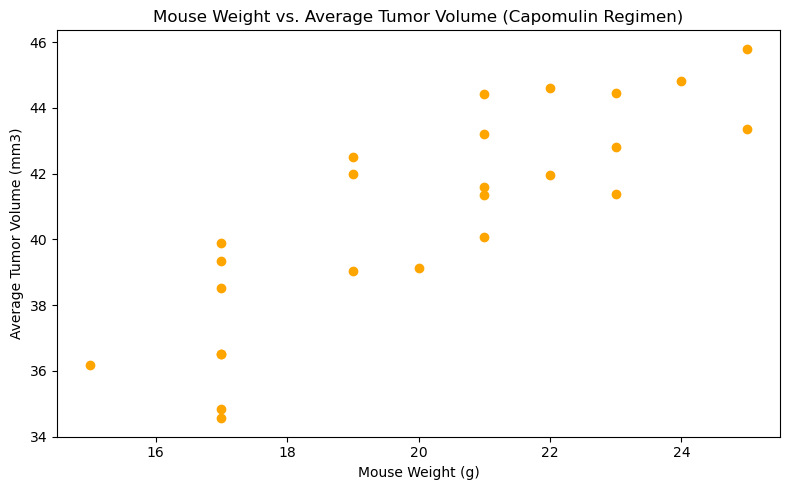

In [92]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame for the Capomulin regimen
capomulin_data = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='orange')

# Set labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.tight_layout()
plt.show()

## Correlation and Regression

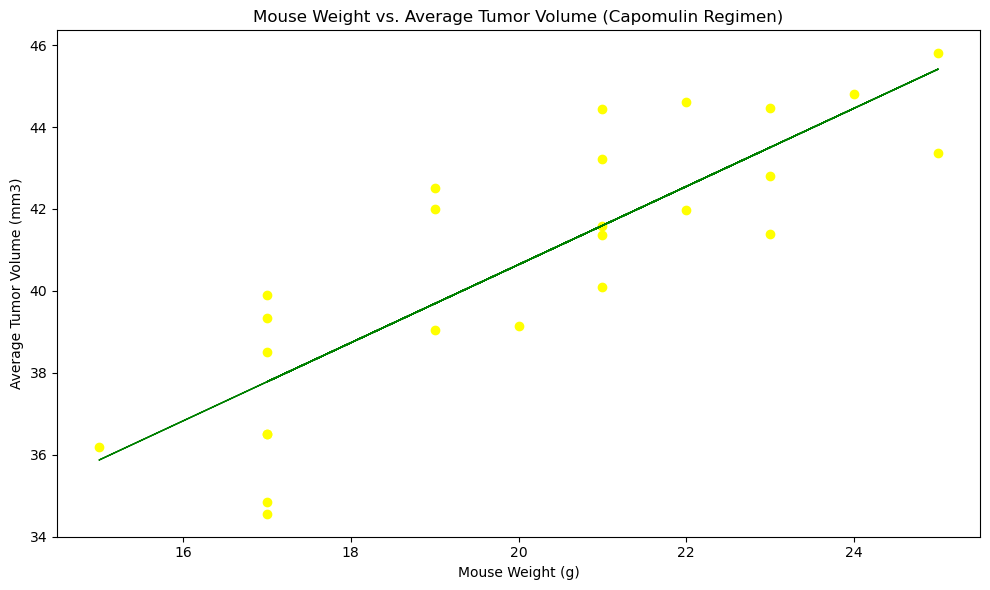

Correlation Coefficient: 0.84
Regression Equation: Average Tumor Volume = 0.95 * Mouse Weight + 21.55


In [99]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# First Filter the DataFrame for the Capomulin regimen
capomulin_data = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient using numpy's corrcoef
correlation_coefficient = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='yellow')

# Set labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(mouse_weight.values.reshape(-1, 1), avg_tumor_volume.values.reshape(-1, 1))

# Get the coefficients of the linear regression model
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]

# Create the regression line
regression_line = slope * mouse_weight + intercept

# Plot the regression line
plt.plot(mouse_weight, regression_line, color='green', linewidth=1)

# Display the plot
plt.tight_layout()
plt.show()

# Print the correlation coefficient and regression equation
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'Regression Equation: Average Tumor Volume = {slope:.2f} * Mouse Weight + {intercept:.2f}')
